# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

17:16:01 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=119340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=767978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=975673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=855669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

17:16:02 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=484529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=356366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

17:16:03 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=404390;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=924953;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

17:16:04 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=356378;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=933857;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

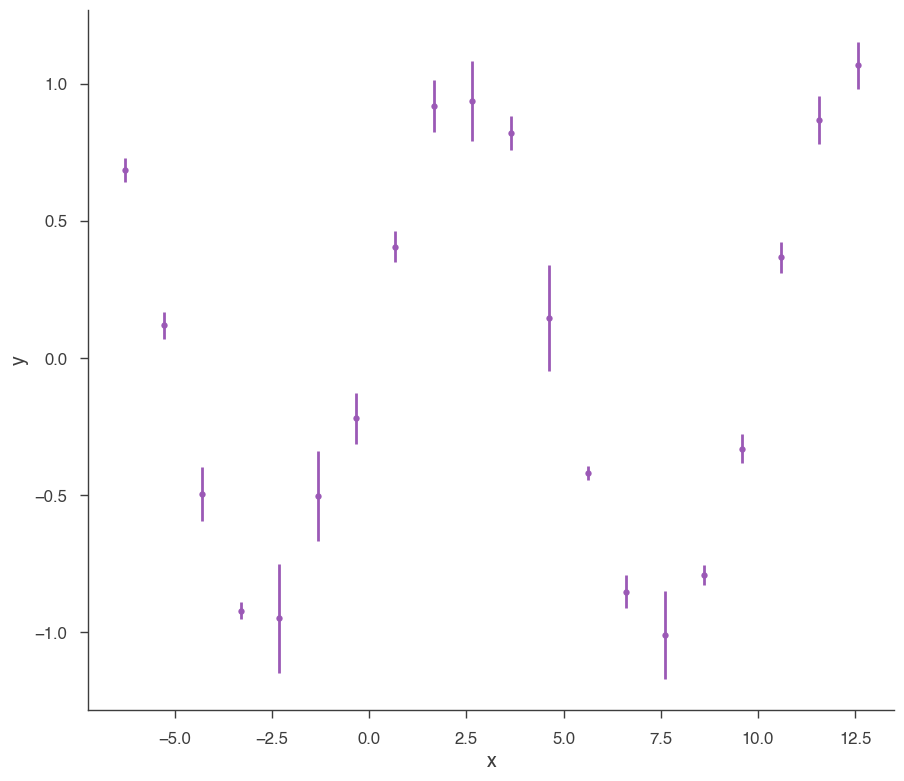

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=233747;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=756427;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

17:16:07 INFO      Mean acceptance fraction: 0.7198                                            ]8;id=207695;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=131594;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=950380;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=221347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=777667;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=383629;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                              
demo.spectrum.main.Sin.K           1.035 -0.020 +0.017  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.965 -0.035 +0.04) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -5.256177
total        -5.256177

Values of statistical measures:

statistical measures
AIC              15.218236
BIC              16.503818
DIC              14.329924
PDIC              1.903911

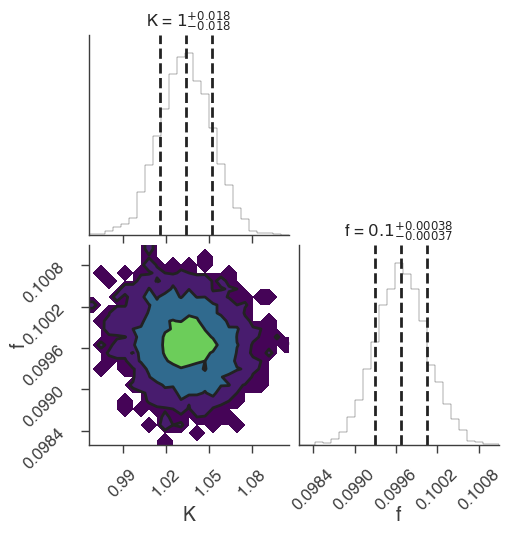

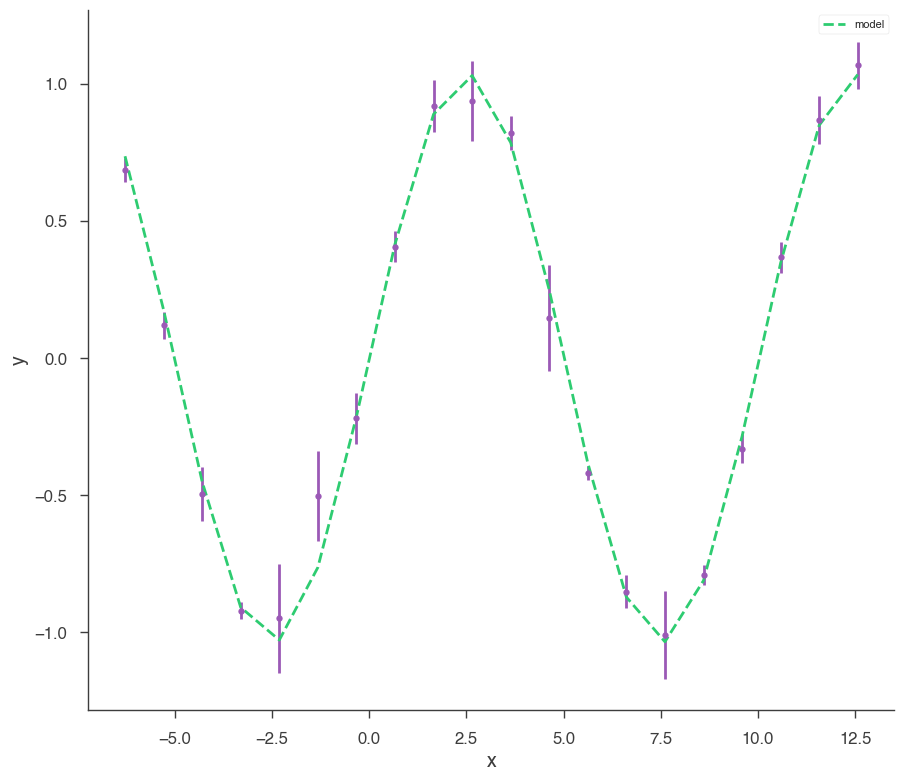

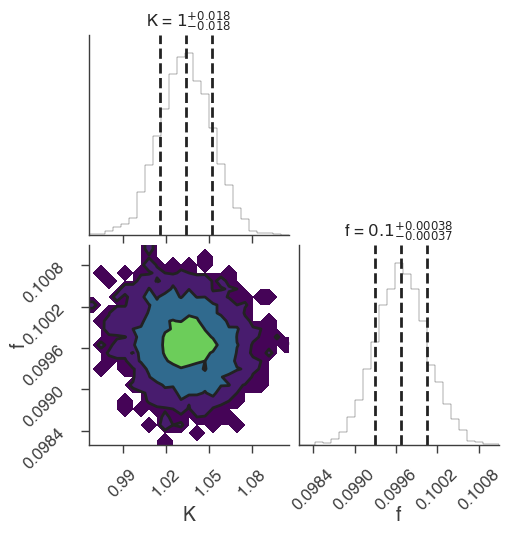

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

17:16:08 INFO      sampler set to multinest                                                ]8;id=192707;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=142568;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -14.460685642815699      +/-  0.14415046801081491     
 Total Likelihood Evaluations:         6291
 Sampling finished. Exiting MultiNest



17:16:09 INFO      fit restored to maximum of posterior                                         ]8;id=235144;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=446813;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=637427;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=375503;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                               
demo.spectrum.main.Sin.K            1.036 -0.017 +0.020  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.965 -0.035 +0.034) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -5.256254
total        -5.256254

Values of statistical measures:

statistical measures
AIC                15.218390
BIC                16.503972
DIC                14.235825
PDIC                1.859207
log(Z)             -6.280196

         INFO      deleting the chain directory chains                                     ]8;id=824785;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=903644;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

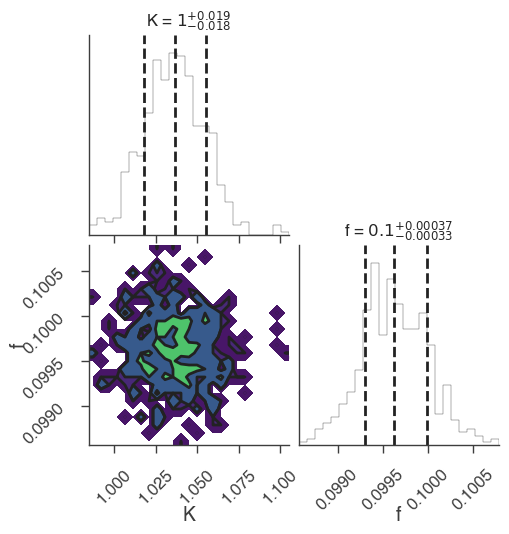

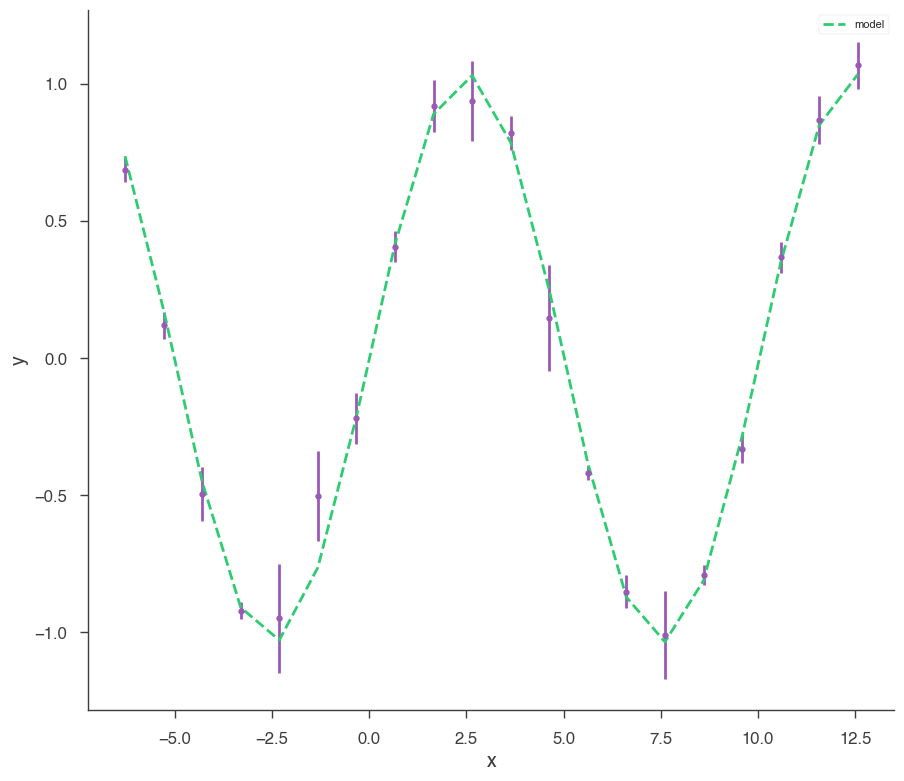

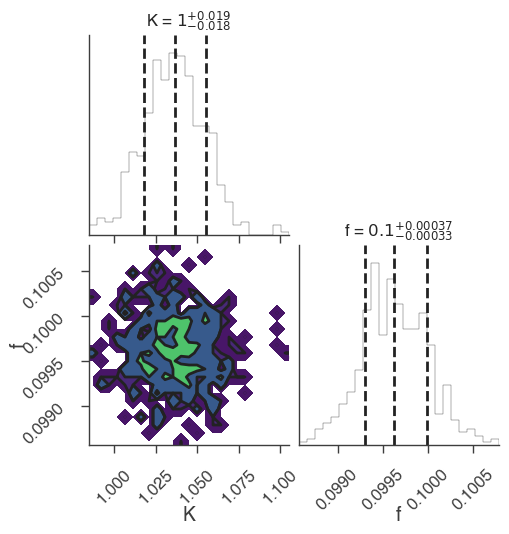

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

17:16:10 INFO      sampler set to dynesty_nested                                           ]8;id=378917;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=650731;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

232it [00:00, 2317.75it/s, bound: 0 | nc: 5 | ncall: 715 | eff(%): 32.448 | loglstar:   -inf < -2631.306 <    inf | logz: -2638.512 +/-  0.132 | dlogz: 2618.083 >  0.409]

464it [00:00, 1758.05it/s, bound: 0 | nc: 3 | ncall: 1282 | eff(%): 36.193 | loglstar:   -inf < -1910.435 <    inf | logz: -1918.040 +/-  0.132 | dlogz: 1895.518 >  0.409]

648it [00:00, 1455.10it/s, bound: 0 | nc: 1 | ncall: 1950 | eff(%): 33.231 | loglstar:   -inf < -1517.618 <    inf | logz: -1524.758 +/-  0.127 | dlogz: 1508.840 >  0.409]

801it [00:00, 939.13it/s, bound: 0 | nc: 3 | ncall: 3024 | eff(%): 26.488 | loglstar:   -inf < -1255.550 <    inf | logz: -1262.766 +/-  0.132 | dlogz: 1252.296 >  0.409] 

915it [00:00, 805.17it/s, bound: 0 | nc: 2 | ncall: 4154 | eff(%): 22.027 | loglstar:   -inf < -1111.740 <    inf | logz: -1118.901 +/-  0.129 | dlogz: 1109.967 >  0.409]

1009it [00:01, 669.55it/s, bound: 0 | nc: 4 | ncall: 5567 | eff(%): 18.125 | loglstar:   -inf < -866.087 <    inf | logz: -875.274 +/-  0.151 | dlogz: 870.545 >  0.409]  

1086it [00:01, 646.19it/s, bound: 0 | nc: 26 | ncall: 6663 | eff(%): 16.299 | loglstar:   -inf < -661.260 <    inf | logz: -670.346 +/-  0.144 | dlogz: 662.163 >  0.409]

1156it [00:01, 543.92it/s, bound: 0 | nc: 7 | ncall: 8137 | eff(%): 14.207 | loglstar:   -inf < -519.773 <    inf | logz: -528.847 +/-  0.146 | dlogz: 520.496 >  0.409] 

1215it [00:01, 481.76it/s, bound: 0 | nc: 60 | ncall: 9417 | eff(%): 12.902 | loglstar:   -inf < -425.528 <    inf | logz: -435.182 +/-  0.153 | dlogz: 428.140 >  0.409]

1266it [00:01, 420.13it/s, bound: 0 | nc: 38 | ncall: 10923 | eff(%): 11.590 | loglstar:   -inf < -369.479 <    inf | logz: -378.045 +/-  0.139 | dlogz: 368.419 >  0.409]

1310it [00:01, 382.42it/s, bound: 0 | nc: 6 | ncall: 12129 | eff(%): 10.801 | loglstar:   -inf < -328.342 <    inf | logz: -336.810 +/-  0.140 | dlogz: 327.785 >  0.409] 

1349it [00:02, 265.94it/s, bound: 1 | nc: 1 | ncall: 13466 | eff(%): 10.018 | loglstar:   -inf < -305.693 <    inf | logz: -314.192 +/-  0.137 | dlogz: 305.056 >  0.409]

1579it [00:02, 600.05it/s, bound: 1 | nc: 5 | ncall: 13795 | eff(%): 11.446 | loglstar:   -inf < -184.773 <    inf | logz: -193.590 +/-  0.137 | dlogz: 183.680 >  0.409]

1712it [00:02, 636.84it/s, bound: 2 | nc: 1 | ncall: 14065 | eff(%): 12.172 | loglstar:   -inf < -136.982 <    inf | logz: -146.623 +/-  0.146 | dlogz: 136.641 >  0.409]

1944it [00:02, 955.75it/s, bound: 2 | nc: 3 | ncall: 14405 | eff(%): 13.495 | loglstar:   -inf < -79.678 <    inf | logz: -89.114 +/-  0.146 | dlogz: 78.349 >  0.409]   

2074it [00:02, 861.56it/s, bound: 3 | nc: 1 | ncall: 14680 | eff(%): 14.128 | loglstar:   -inf < -62.868 <    inf | logz: -71.891 +/-  0.143 | dlogz: 60.681 >  0.409]

2310it [00:02, 1165.17it/s, bound: 3 | nc: 1 | ncall: 15003 | eff(%): 15.397 | loglstar:   -inf < -38.186 <    inf | logz: -47.037 +/-  0.142 | dlogz: 36.027 >  0.409]

2459it [00:03, 1011.89it/s, bound: 4 | nc: 1 | ncall: 15310 | eff(%): 16.061 | loglstar:   -inf < -29.372 <    inf | logz: -38.419 +/-  0.143 | dlogz: 27.030 >  0.409]

2668it [00:03, 1235.67it/s, bound: 4 | nc: 3 | ncall: 15657 | eff(%): 17.040 | loglstar:   -inf < -20.027 <    inf | logz: -29.506 +/-  0.145 | dlogz: 17.628 >  0.409]

2819it [00:03, 1094.07it/s, bound: 5 | nc: 2 | ncall: 15929 | eff(%): 17.697 | loglstar:   -inf < -15.486 <    inf | logz: -24.669 +/-  0.144 | dlogz: 12.394 >  0.409]

3039it [00:03, 1331.01it/s, bound: 5 | nc: 3 | ncall: 16273 | eff(%): 18.675 | loglstar:   -inf < -11.032 <    inf | logz: -20.345 +/-  0.145 | dlogz:  7.519 >  0.409]

3196it [00:03, 1138.62it/s, bound: 6 | nc: 1 | ncall: 16557 | eff(%): 19.303 | loglstar:   -inf < -8.904 <    inf | logz: -18.439 +/-  0.145 | dlogz:  5.223 >  0.409] 

3369it [00:03, 1265.29it/s, bound: 6 | nc: 2 | ncall: 16899 | eff(%): 19.936 | loglstar:   -inf < -7.595 <    inf | logz: -16.968 +/-  0.145 | dlogz:  3.346 >  0.409]

3515it [00:03, 1160.79it/s, bound: 7 | nc: 1 | ncall: 17147 | eff(%): 20.499 | loglstar:   -inf < -6.919 <    inf | logz: -16.199 +/-  0.145 | dlogz:  2.309 >  0.409]

3731it [00:04, 1389.45it/s, bound: 7 | nc: 1 | ncall: 17484 | eff(%): 21.340 | loglstar:   -inf < -6.197 <    inf | logz: -15.500 +/-  0.144 | dlogz:  1.288 >  0.409]

3887it [00:04, 1203.19it/s, bound: 8 | nc: 1 | ncall: 17766 | eff(%): 21.879 | loglstar:   -inf < -5.861 <    inf | logz: -15.177 +/-  0.144 | dlogz:  0.828 >  0.409]

4098it [00:04, 1409.32it/s, bound: 8 | nc: 6 | ncall: 18101 | eff(%): 22.640 | loglstar:   -inf < -5.626 <    inf | logz: -14.905 +/-  0.144 | dlogz:  0.457 >  0.409]

4138it [00:04, 926.86it/s, +400 | bound: 8 | nc: 1 | ncall: 18597 | eff(%): 24.938 | loglstar:   -inf < -5.222 <    inf | logz: -14.518 +/-  0.144 | dlogz:  0.001 >  0.409]

17:16:15 INFO      fit restored to maximum of posterior                                         ]8;id=175615;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=679756;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=752350;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=987508;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K      1.036 -0.020 +0.018  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.96 +/- 0.04) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo          -5.25671
total         -5.25671

Values of statistical measures:

statistical measures
AIC                15.219303
BIC                16.504885
DIC                14.452153
PDIC                1.969701
log(Z)             -6.304970

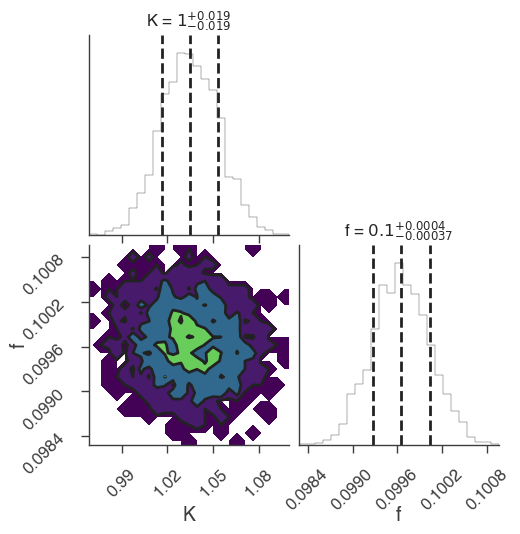

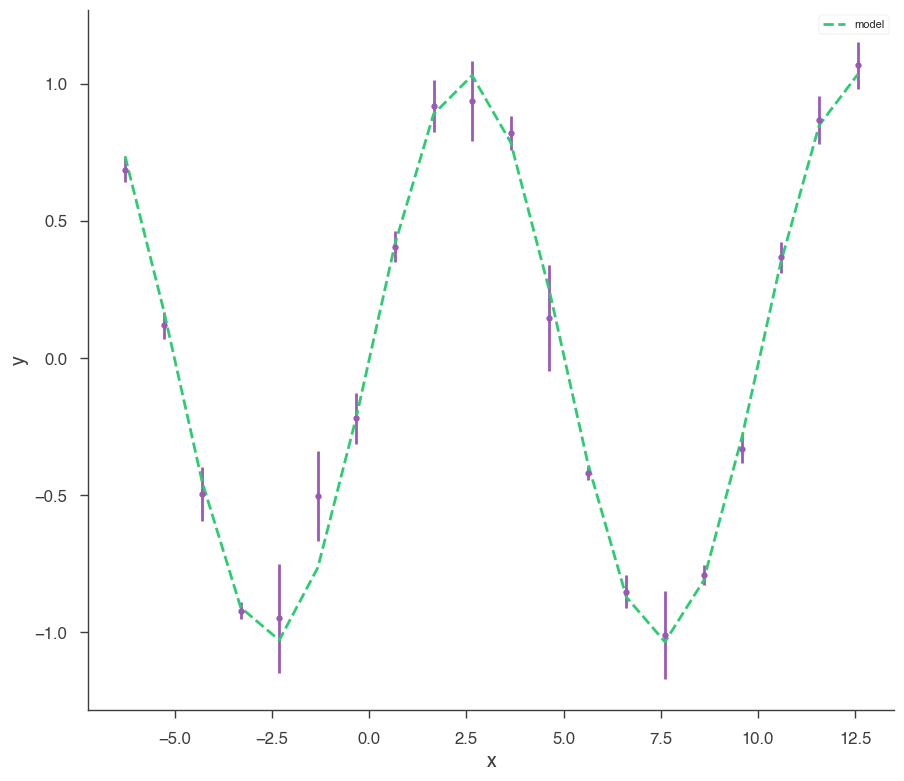

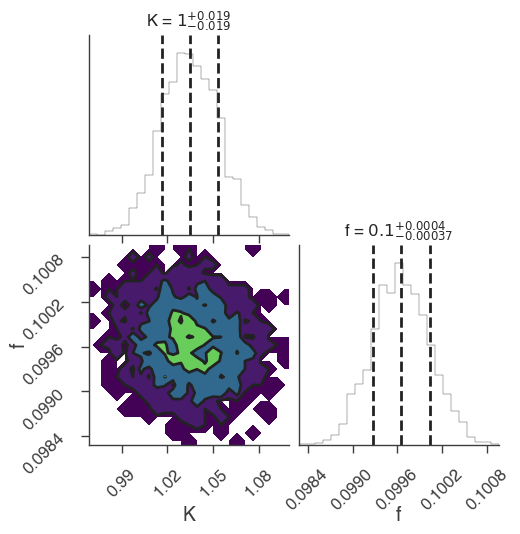

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=844807;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=195220;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

116it [00:00, 1159.84it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 123 | eff(%): 18.620 | loglstar:   -inf < -3789.306 <    inf | logz: -3796.390 +/-  0.117 | dlogz: 3775.750 >  0.010]

328it [00:00, 1722.28it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 475 | eff(%): 33.641 | loglstar:   -inf < -2501.600 <    inf | logz: -2508.161 +/-  0.113 | dlogz: 2484.641 >  0.010]

501it [00:00, 1714.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 875 | eff(%): 36.436 | loglstar:   -inf < -2057.495 <    inf | logz: -2065.091 +/-  0.117 | dlogz: 2041.734 >  0.010]

673it [00:00, 1501.60it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1499 | eff(%): 33.667 | loglstar:   -inf < -1726.105 <    inf | logz: -1733.516 +/-  0.120 | dlogz: 1727.910 >  0.010]

827it [00:00, 1307.05it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2239 | eff(%): 30.194 | loglstar:   -inf < -1507.689 <    inf | logz: -1515.654 +/-  0.118 | dlogz: 1509.626 >  0.010]

963it [00:00, 1083.53it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 3120 | eff(%): 26.602 | loglstar:   -inf < -1355.129 <    inf | logz: -1362.335 +/-  0.115 | dlogz: 1355.394 >  0.010]

1079it [00:00, 850.85it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 4245 | eff(%): 22.740 | loglstar:   -inf < -1201.281 <    inf | logz: -1208.466 +/-  0.116 | dlogz: 1201.129 >  0.010]

1175it [00:01, 731.05it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 5310 | eff(%): 20.224 | loglstar:   -inf < -1099.548 <    inf | logz: -1107.268 +/-  0.119 | dlogz: 1099.864 >  0.010]

1257it [00:01, 653.70it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 6231 | eff(%): 18.675 | loglstar:   -inf < -889.160 <    inf | logz: -897.348 +/-  0.124 | dlogz: 890.069 >  0.010]   

1328it [00:01, 579.20it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 7242 | eff(%): 17.153 | loglstar:   -inf < -734.797 <    inf | logz: -742.778 +/-  0.122 | dlogz: 735.085 >  0.010]

1390it [00:01, 505.74it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 8279 | eff(%): 15.833 | loglstar:   -inf < -635.095 <    inf | logz: -644.366 +/-  0.130 | dlogz: 637.470 >  0.010]

1444it [00:01, 422.39it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9377 | eff(%): 14.620 | loglstar:   -inf < -534.264 <    inf | logz: -543.230 +/-  0.129 | dlogz: 535.898 >  0.010] 

1490it [00:02, 384.61it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 10375 | eff(%): 13.701 | loglstar:   -inf < -473.944 <    inf | logz: -482.789 +/-  0.126 | dlogz: 474.943 >  0.010]

1531it [00:02, 338.81it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 11712 | eff(%): 12.537 | loglstar:   -inf < -425.872 <    inf | logz: -434.572 +/-  0.126 | dlogz: 426.574 >  0.010]

1566it [00:02, 316.08it/s, batch: 0 | bound: 0 | nc: 129 | ncall: 12643 | eff(%): 11.915 | loglstar:   -inf < -401.040 <    inf | logz: -410.192 +/-  0.127 | dlogz: 402.370 >  0.010]

1598it [00:02, 310.10it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13595 | eff(%): 11.337 | loglstar:   -inf < -384.073 <    inf | logz: -392.559 +/-  0.125 | dlogz: 384.272 >  0.010]  

1630it [00:02, 274.09it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 14656 | eff(%): 10.755 | loglstar:   -inf < -366.314 <    inf | logz: -374.466 +/-  0.122 | dlogz: 365.950 >  0.010]

1661it [00:02, 278.74it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 15425 | eff(%): 10.430 | loglstar:   -inf < -343.926 <    inf | logz: -352.956 +/-  0.128 | dlogz: 344.832 >  0.010]

1690it [00:03, 209.51it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16420 | eff(%):  9.988 | loglstar:   -inf < -323.422 <    inf | logz: -331.895 +/-  0.124 | dlogz: 323.314 >  0.010] 

1911it [00:03, 610.40it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 16708 | eff(%): 11.105 | loglstar:   -inf < -217.998 <    inf | logz: -227.337 +/-  0.127 | dlogz: 218.452 >  0.010]

2077it [00:03, 843.50it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17034 | eff(%): 11.846 | loglstar:   -inf < -164.924 <    inf | logz: -174.629 +/-  0.129 | dlogz: 165.405 >  0.010]

2185it [00:03, 724.08it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17239 | eff(%): 12.317 | loglstar:   -inf < -135.300 <    inf | logz: -144.712 +/-  0.133 | dlogz: 135.191 >  0.010]

2397it [00:03, 1026.53it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17562 | eff(%): 13.271 | loglstar:   -inf < -91.558 <    inf | logz: -100.203 +/-  0.126 | dlogz: 90.077 >  0.010] 

2547it [00:03, 871.23it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 17914 | eff(%): 13.832 | loglstar:   -inf < -69.630 <    inf | logz: -79.079 +/-  0.128 | dlogz: 68.715 >  0.010]  

2774it [00:03, 1158.29it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18217 | eff(%): 14.821 | loglstar:   -inf < -46.838 <    inf | logz: -56.236 +/-  0.130 | dlogz: 45.523 >  0.010]

2953it [00:03, 1299.32it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 18563 | eff(%): 15.491 | loglstar:   -inf < -34.802 <    inf | logz: -43.880 +/-  0.128 | dlogz: 32.762 >  0.010]

3108it [00:04, 1107.52it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18791 | eff(%): 16.111 | loglstar:   -inf < -27.353 <    inf | logz: -36.406 +/-  0.128 | dlogz: 24.965 >  0.010]

3304it [00:04, 1295.33it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19124 | eff(%): 16.837 | loglstar:   -inf < -19.614 <    inf | logz: -28.909 +/-  0.129 | dlogz: 17.071 >  0.010]

3455it [00:04, 980.42it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19433 | eff(%): 17.333 | loglstar:   -inf < -16.067 <    inf | logz: -25.272 +/-  0.128 | dlogz: 13.168 >  0.010] 

3671it [00:04, 1215.55it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19742 | eff(%): 18.136 | loglstar:   -inf < -12.101 <    inf | logz: -21.429 +/-  0.129 | dlogz:  8.888 >  0.010]

3850it [00:04, 1341.48it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20080 | eff(%): 18.707 | loglstar:   -inf < -9.979 <    inf | logz: -19.239 +/-  0.129 | dlogz:  6.338 >  0.010] 

4010it [00:04, 1072.18it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20341 | eff(%): 19.241 | loglstar:   -inf < -8.730 <    inf | logz: -17.964 +/-  0.128 | dlogz:  4.747 >  0.010]

4206it [00:05, 1256.48it/s, batch: 0 | bound: 6 | nc: 8 | ncall: 20684 | eff(%): 19.855 | loglstar:   -inf < -7.512 <    inf | logz: -16.819 +/-  0.129 | dlogz:  3.240 >  0.010]

4358it [00:05, 1022.23it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 20989 | eff(%): 20.280 | loglstar:   -inf < -6.863 <    inf | logz: -16.161 +/-  0.129 | dlogz:  2.338 >  0.010]

4579it [00:05, 1262.06it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21328 | eff(%): 20.978 | loglstar:   -inf < -6.267 <    inf | logz: -15.522 +/-  0.129 | dlogz:  1.429 >  0.010]

4738it [00:05, 1120.86it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 21681 | eff(%): 21.361 | loglstar:   -inf < -5.988 <    inf | logz: -15.223 +/-  0.129 | dlogz:  0.997 >  0.010]

4966it [00:05, 1365.10it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 21986 | eff(%): 22.085 | loglstar:   -inf < -5.708 <    inf | logz: -14.933 +/-  0.129 | dlogz:  0.595 >  0.010]

5144it [00:05, 1460.04it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22339 | eff(%): 22.523 | loglstar:   -inf < -5.560 <    inf | logz: -14.784 +/-  0.128 | dlogz:  0.399 >  0.010]

5311it [00:05, 1198.62it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 22584 | eff(%): 23.007 | loglstar:   -inf < -5.473 <    inf | logz: -14.686 +/-  0.128 | dlogz:  0.276 >  0.010]

5505it [00:06, 1360.44it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22900 | eff(%): 23.526 | loglstar:   -inf < -5.400 <    inf | logz: -14.607 +/-  0.128 | dlogz:  0.182 >  0.010]

5662it [00:06, 1081.16it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23210 | eff(%): 23.880 | loglstar:   -inf < -5.351 <    inf | logz: -14.562 +/-  0.128 | dlogz:  0.131 >  0.010]

5867it [00:06, 1281.82it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23502 | eff(%): 24.444 | loglstar:   -inf < -5.304 <    inf | logz: -14.521 +/-  0.128 | dlogz:  0.085 >  0.010]

6045it [00:06, 1394.40it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23838 | eff(%): 24.838 | loglstar:   -inf < -5.280 <    inf | logz: -14.496 +/-  0.128 | dlogz:  0.059 >  0.010]

6206it [00:06, 992.38it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24081 | eff(%): 25.247 | loglstar:   -inf < -5.264 <    inf | logz: -14.480 +/-  0.128 | dlogz:  0.042 >  0.010] 

6405it [00:06, 1185.66it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24414 | eff(%): 25.708 | loglstar:   -inf < -5.250 <    inf | logz: -14.467 +/-  0.128 | dlogz:  0.028 >  0.010]

6555it [00:07, 1001.31it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 24718 | eff(%): 25.993 | loglstar:   -inf < -5.243 <    inf | logz: -14.460 +/-  0.128 | dlogz:  0.021 >  0.010]

6763it [00:07, 1213.31it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 25026 | eff(%): 26.495 | loglstar:   -inf < -5.236 <    inf | logz: -14.453 +/-  0.128 | dlogz:  0.014 >  0.010]

6920it [00:07, 1291.51it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25355 | eff(%): 26.765 | loglstar:   -inf < -5.232 <    inf | logz: -14.449 +/-  0.128 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7421it [00:08, 828.79it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 25860 | eff(%): 28.697 | loglstar: -7.064 < -6.364 < -5.715 | logz: -14.439 +/-  0.132 | stop:  1.426]            

7619it [00:08, 960.59it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 26133 | eff(%): 28.513 | loglstar: -7.064 < -6.471 < -5.715 | logz: -14.439 +/-  0.132 | stop:  1.426]

7805it [00:08, 1086.92it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 26474 | eff(%): 28.841 | loglstar: -7.064 < -6.074 < -5.715 | logz: -14.439 +/-  0.132 | stop:  1.426]

7964it [00:08, 954.81it/s, batch: 1 | bound: 3 | nc: 3 | ncall: 26741 | eff(%): 29.141 | loglstar: -7.064 < -5.820 < -5.715 | logz: -14.439 +/-  0.132 | stop:  1.426] 

8455it [00:08, 1600.49it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27326 | eff(%): 30.805 | loglstar: -7.064 < -5.316 < -5.715 | logz: -14.439 +/-  0.132 | stop:  1.426]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8694it [00:09, 709.03it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27614 | eff(%): 30.935 | loglstar: -7.496 < -6.895 < -7.062 | logz: -14.437 +/-  0.108 | stop:  1.040] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9153it [00:10, 604.42it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 28104 | eff(%): 32.568 | loglstar: -7.914 < -6.707 < -7.492 | logz: -14.451 +/-  0.101 | stop:  1.070]

9552it [00:10, 849.48it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28558 | eff(%): 33.223 | loglstar: -7.914 < -5.982 < -7.492 | logz: -14.451 +/-  0.101 | stop:  1.070]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9719it [00:11, 879.59it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28751 | eff(%): 33.804 | loglstar: -7.914 < -5.224 < -7.492 | logz: -14.451 +/-  0.101 | stop:  0.867]

17:16:27 INFO      fit restored to maximum of posterior                                         ]8;id=725193;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=412428;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=123794;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=445808;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K          1.035 +/- 0.019  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.97 +/- 0.04) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -5.256127
total        -5.256127

Values of statistical measures:

statistical measures
AIC                15.218137
BIC                16.503720
DIC                14.428228
PDIC                1.957718
log(Z)             -6.275039

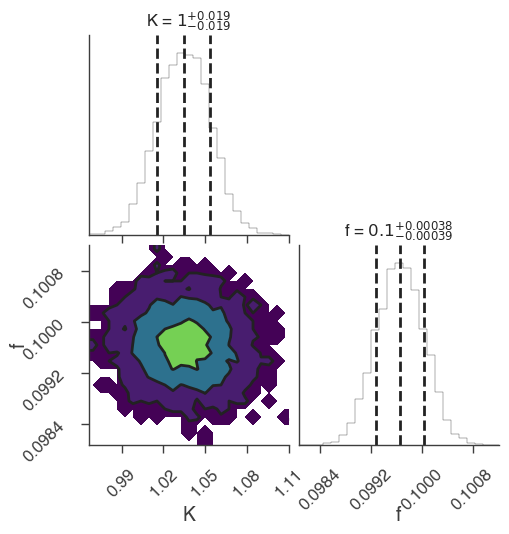

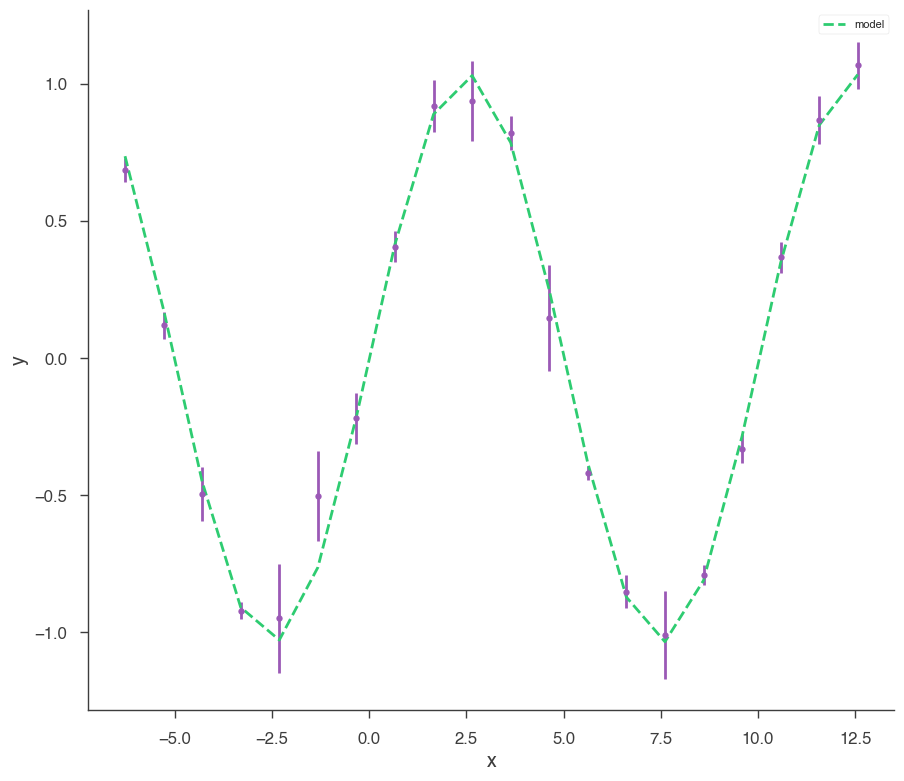

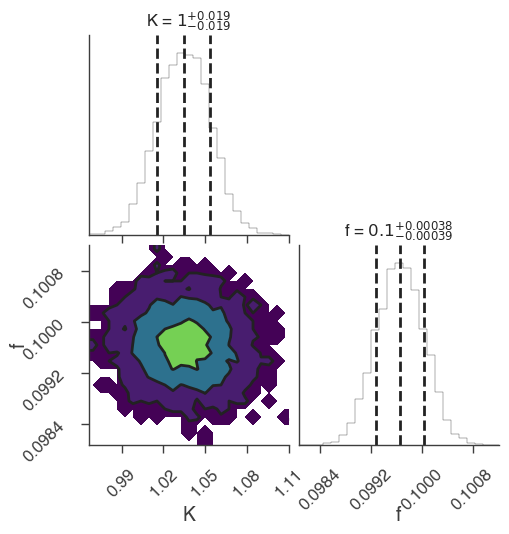

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=347875;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=693600;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 46.90it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:13, 44.46it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:12, 50.63it/s]

Sampling progress :   4%|▎         | 22/625 [00:00<00:11, 51.58it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:10, 57.71it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:09, 60.61it/s]

Sampling progress :   7%|▋         | 43/625 [00:00<00:09, 60.42it/s]

Sampling progress :   8%|▊         | 51/625 [00:00<00:08, 65.51it/s]

Sampling progress :   9%|▉         | 58/625 [00:00<00:08, 64.75it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:08, 65.89it/s]

Sampling progress :  12%|█▏        | 72/625 [00:01<00:08, 66.77it/s]

Sampling progress :  13%|█▎        | 80/625 [00:01<00:07, 70.60it/s]

Sampling progress :  14%|█▍        | 88/625 [00:01<00:07, 71.55it/s]

Sampling progress :  16%|█▌        | 97/625 [00:01<00:07, 75.34it/s]

Sampling progress :  17%|█▋        | 106/625 [00:01<00:06, 76.74it/s]

Sampling progress :  18%|█▊        | 114/625 [00:01<00:06, 77.38it/s]

Sampling progress :  20%|█▉        | 122/625 [00:01<00:06, 75.74it/s]

Sampling progress :  21%|██        | 130/625 [00:01<00:06, 76.12it/s]

Sampling progress :  22%|██▏       | 138/625 [00:02<00:06, 75.45it/s]

Sampling progress :  23%|██▎       | 146/625 [00:02<00:06, 72.94it/s]

Sampling progress :  25%|██▍       | 154/625 [00:02<00:06, 74.59it/s]

Sampling progress :  26%|██▌       | 162/625 [00:02<00:06, 71.69it/s]

Sampling progress :  27%|██▋       | 170/625 [00:02<00:06, 71.92it/s]

Sampling progress :  28%|██▊       | 178/625 [00:02<00:06, 73.45it/s]

Sampling progress :  30%|██▉       | 186/625 [00:02<00:06, 71.58it/s]

Sampling progress :  31%|███       | 194/625 [00:02<00:06, 70.45it/s]

Sampling progress :  32%|███▏      | 202/625 [00:02<00:05, 71.31it/s]

Sampling progress :  34%|███▎      | 210/625 [00:03<00:05, 71.95it/s]

Sampling progress :  35%|███▍      | 218/625 [00:03<00:05, 71.11it/s]

Sampling progress :  36%|███▌      | 226/625 [00:03<00:05, 69.43it/s]

Sampling progress :  37%|███▋      | 233/625 [00:03<00:05, 68.35it/s]

Sampling progress :  39%|███▊      | 242/625 [00:03<00:05, 72.87it/s]

Sampling progress :  40%|████      | 250/625 [00:03<00:05, 72.62it/s]

Sampling progress :  41%|████▏     | 258/625 [00:03<00:05, 72.87it/s]

Sampling progress :  43%|████▎     | 266/625 [00:03<00:04, 72.63it/s]

Sampling progress :  44%|████▍     | 274/625 [00:03<00:05, 69.32it/s]

Sampling progress :  45%|████▌     | 282/625 [00:04<00:04, 71.01it/s]

Sampling progress :  46%|████▋     | 290/625 [00:04<00:04, 68.20it/s]

Sampling progress :  48%|████▊     | 297/625 [00:04<00:04, 68.44it/s]

Sampling progress :  49%|████▊     | 304/625 [00:04<00:04, 67.16it/s]

Sampling progress :  50%|█████     | 313/625 [00:04<00:04, 71.50it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:04<00:04, 72.35it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:04<00:04, 68.78it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:04<00:03, 72.47it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:04<00:03, 72.18it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:05<00:03, 73.48it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:05<00:03, 72.73it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:05<00:03, 72.90it/s]

Sampling progress :  60%|██████    | 378/625 [00:05<00:03, 71.90it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:05<00:03, 70.67it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:05<00:03, 71.49it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:05<00:02, 75.46it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:05<00:02, 73.05it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:05<00:02, 70.05it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:06<00:02, 70.23it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:06<00:02, 68.10it/s]

Sampling progress :  71%|███████   | 442/625 [00:06<00:02, 66.74it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:06<00:02, 68.81it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:06<00:02, 71.41it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:06<00:02, 69.12it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:06<00:02, 67.56it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:06<00:02, 67.78it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:06<00:02, 66.45it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:07<00:02, 65.48it/s]

Sampling progress :  80%|████████  | 501/625 [00:07<00:01, 65.44it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:07<00:01, 68.84it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:07<00:01, 67.68it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:07<00:01, 69.58it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:07<00:01, 67.74it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:07<00:01, 68.32it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:07<00:01, 70.41it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:07<00:00, 72.92it/s]

Sampling progress :  90%|█████████ | 563/625 [00:08<00:00, 72.46it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:08<00:00, 59.18it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:08<00:00, 62.53it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:08<00:00, 65.05it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:08<00:00, 67.31it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:08<00:00, 68.33it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:08<00:00, 67.02it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:08<00:00, 67.66it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 70.10it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 69.24it/s]

17:16:37 INFO      fit restored to maximum of posterior                                         ]8;id=578245;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=593903;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=677369;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=326024;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 29


Scale Factor: 1.329674


Mean Integrated Autocorrelation Time: 3.28


Effective Sample Size: 3808.47


Number of Log Probability Evaluations: 65394


Effective Samples per Log Probability Evaluation: 0.058239


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K          1.035 +/- 0.019  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.97 +/- 0.04) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -5.256154
total        -5.256154

Values of statistical measures:

statistical measures
AIC              15.218190
BIC              16.503772
DIC              14.449439
PDIC              1.968593

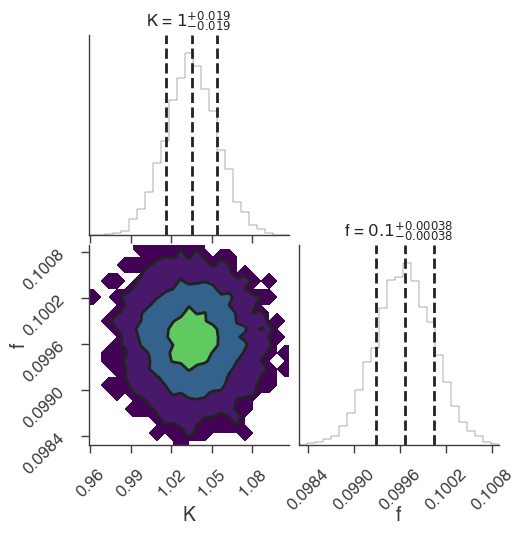

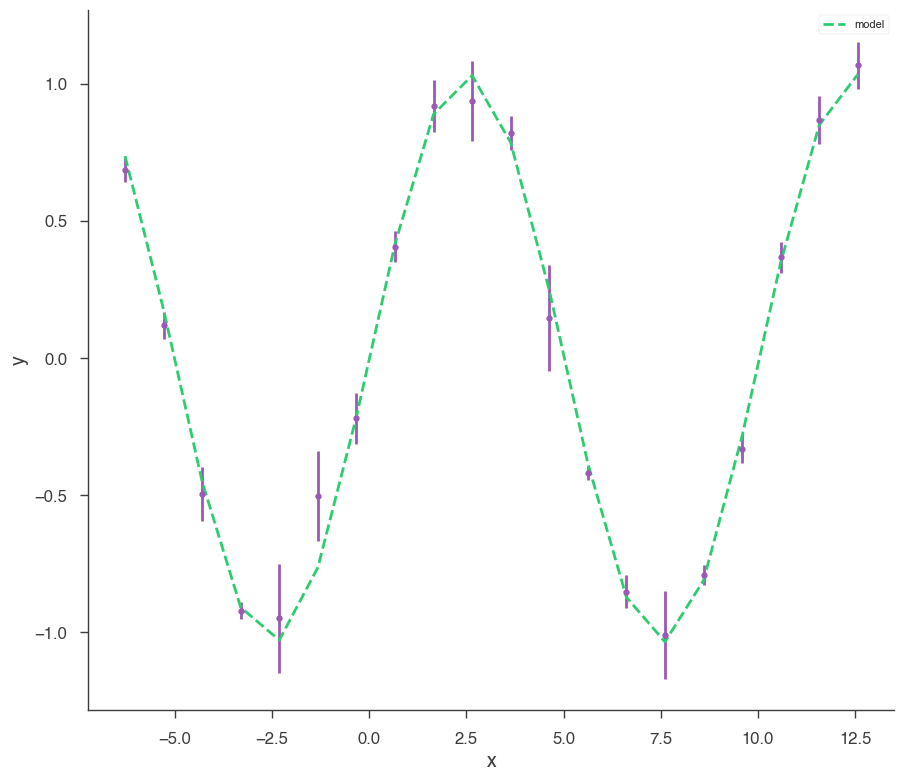

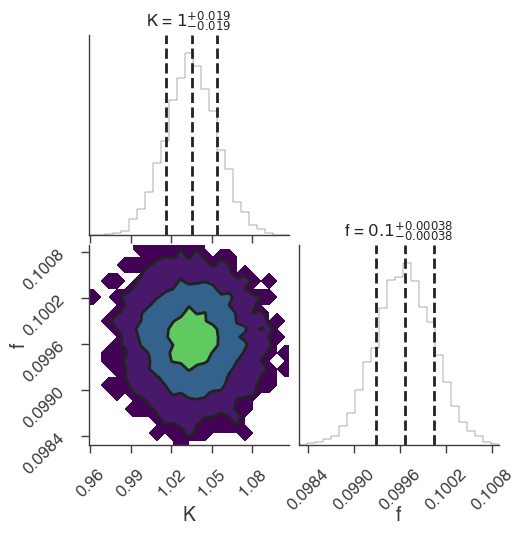

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

17:16:38 INFO      sampler set to ultranest                                                ]8;id=476830;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=965418;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  


[ultranest] Likelihood function evaluations: 8216


[ultranest]   logZ = -14.42 +- 0.09663


[ultranest] Effective samples strategy satisfied (ESS = 987.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


17:16:45 INFO      fit restored to maximum of posterior                                         ]8;id=407612;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=193868;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=790498;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=964943;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K      1.036 -0.021 +0.019  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.97 +/- 0.04) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -5.256454
total        -5.256454

Values of statistical measures:

statistical measures
AIC                15.218790
BIC                16.504373
DIC                14.710485
PDIC                2.098961
log(Z)             -6.259719

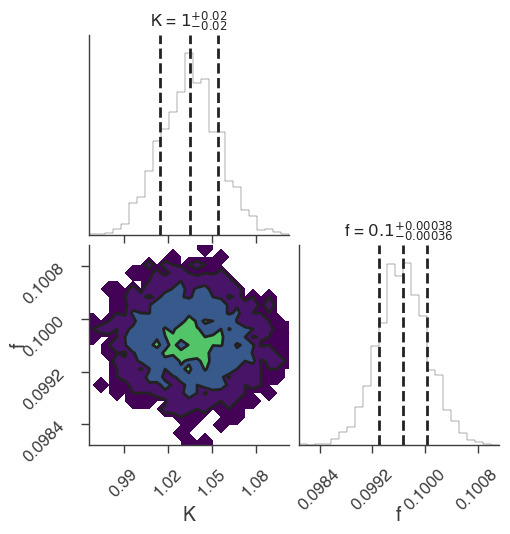

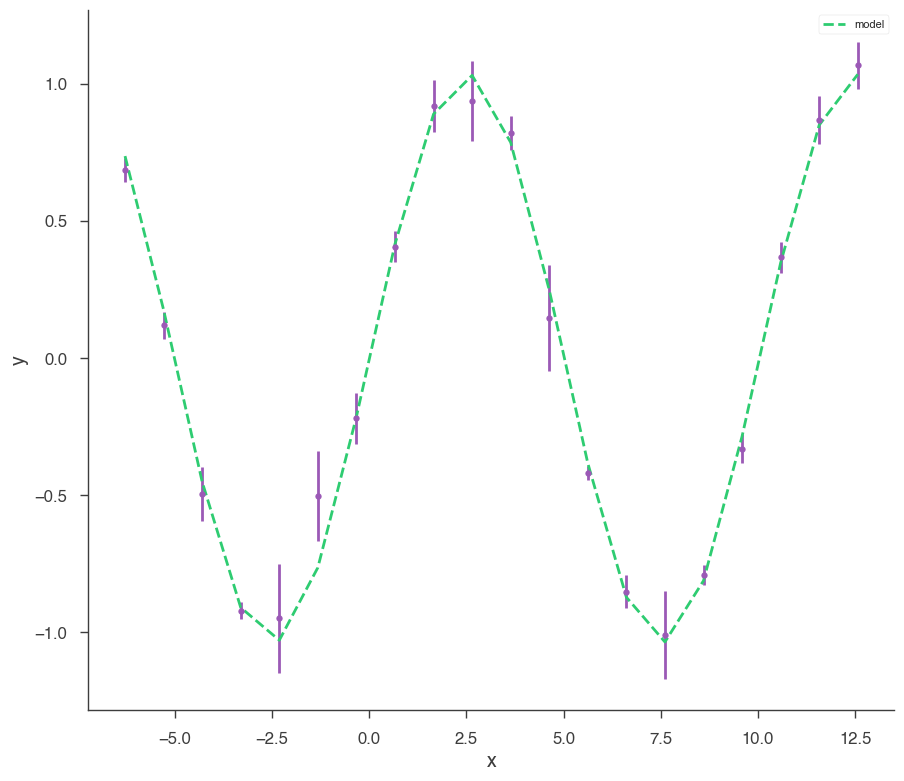

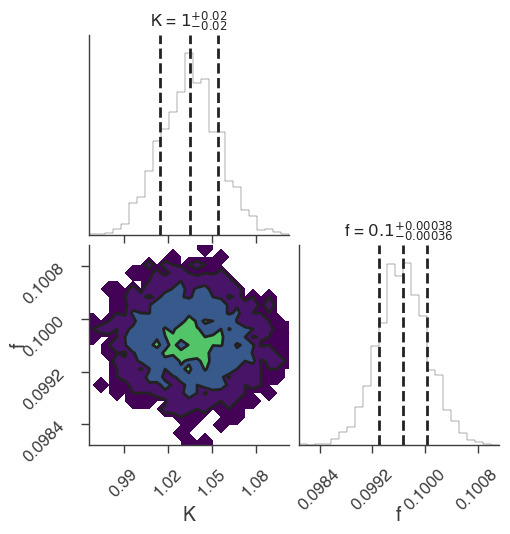

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()